![header](https://drive.google.com/uc?export=view&id=1KuEspEp7OwqGw6uMRJvYE6BVE-Zo-8JF)

 <h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

# Introducción a Redes Neuronales con Keras
### Se intentará resolver un dataset de Scikit-Learn de clasificación binaria usando una neurona y, posteriormente, se añadirán más neuronas para mejorar la clasificación.


# Se cargan las bibliotecas necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Se carga el dataset *make_moons* de Scikit-Learn con 1500 muestras
### https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

In [3]:
from sklearn import datasets

noisy_moons = datasets.make_moons(n_samples=2000, noise=.05)
X, y = noisy_moons
print(X.shape)
print(y.shape)

(2000, 2)
(2000,)


<Axes: >

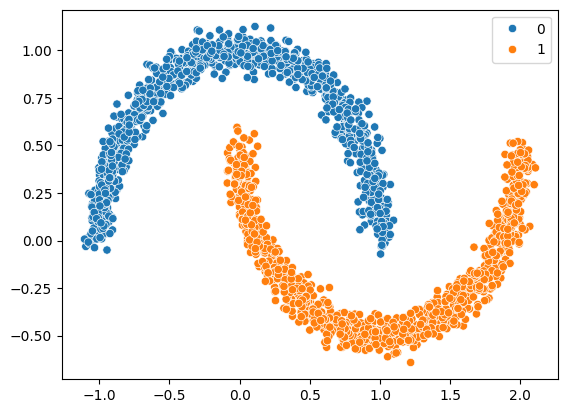

In [4]:
# Feature #1, feature #2, mientras y da el color de las dos clases
sns.scatterplot(x=X[:, 0],y=X[:, 1], hue = y)

In [5]:
y

array([0, 0, 1, ..., 1, 1, 1])

# Se crean los sets de entrenamiento y de prueba y se escalan ambos sets de features entre 0 y 1
### https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 25% para el set de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
# Se escala el set de entrenamiento
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)
# Se escala el set de prueba
scalar = MinMaxScaler()
scalar.fit(X_test)
X_test_scaled = scalar.transform(X_test)

<Axes: >

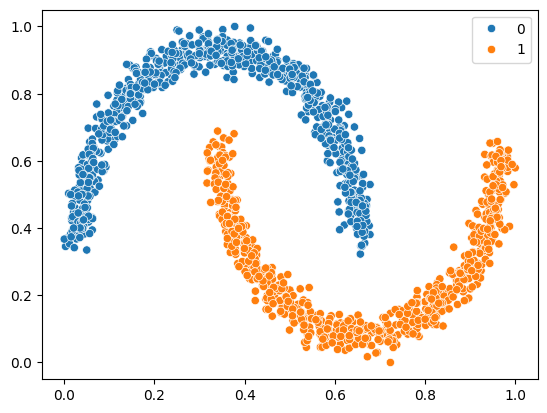

In [7]:
# Se grafican los datos escalados
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train)

# Se cargan las bibliotecas necesarias para definir la red neuronal

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Una sola neurona con dos entradas, una salida.

In [9]:
model = Sequential()
model.add(Dense(units=1, input_dim=2, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy',  metrics=['accuracy'])

/opt/anaconda3/envs/master-ai-tec/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
hist = model.fit(x=X_train_scaled, y=y_train, verbose=2, batch_size=50,epochs=100, shuffle='true')

Epoch 1/100
30/30 - 0s - 6ms/step - accuracy: 0.4533 - loss: 0.7032
Epoch 2/100
30/30 - 0s - 462us/step - accuracy: 0.8373 - loss: 0.6539
Epoch 3/100
30/30 - 0s - 473us/step - accuracy: 0.8687 - loss: 0.6104
Epoch 4/100
30/30 - 0s - 436us/step - accuracy: 0.8633 - loss: 0.5722
Epoch 5/100
30/30 - 0s - 429us/step - accuracy: 0.8620 - loss: 0.5381
Epoch 6/100
30/30 - 0s - 428us/step - accuracy: 0.8607 - loss: 0.5088
Epoch 7/100
30/30 - 0s - 411us/step - accuracy: 0.8613 - loss: 0.4829
Epoch 8/100
30/30 - 0s - 416us/step - accuracy: 0.8587 - loss: 0.4602
Epoch 9/100
30/30 - 0s - 494us/step - accuracy: 0.8587 - loss: 0.4403
Epoch 10/100
30/30 - 0s - 458us/step - accuracy: 0.8607 - loss: 0.4227
Epoch 11/100
30/30 - 0s - 436us/step - accuracy: 0.8627 - loss: 0.4073
Epoch 12/100
30/30 - 0s - 424us/step - accuracy: 0.8633 - loss: 0.3937
Epoch 13/100
30/30 - 0s - 412us/step - accuracy: 0.8613 - loss: 0.3816
Epoch 14/100
30/30 - 0s - 390us/step - accuracy: 0.8620 - loss: 0.3708
Epoch 15/100
30/3

# Se muestra un resumen del modelo, así como la evaluación de los resultados

In [11]:
# resumen del model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

Text(0.5, 0, 'Epoca')

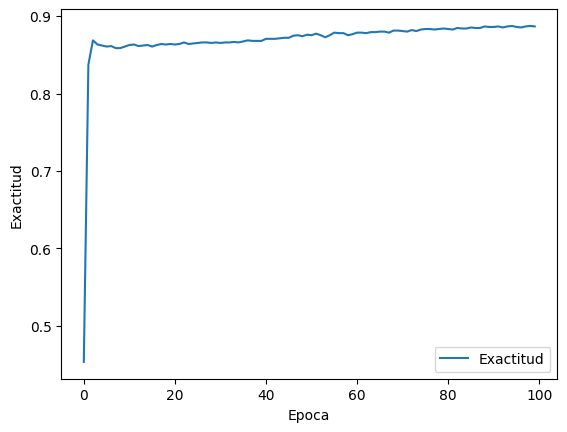

In [12]:
# Exactitud del modelo
plt.plot(hist.history['accuracy']) 
plt.legend(['Exactitud'])
plt.ylabel('Exactitud')
plt.xlabel('Epoca')

Text(0.5, 0, 'Epoca')

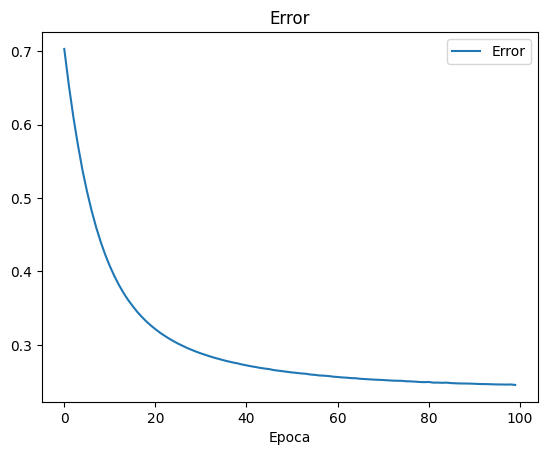

In [13]:
# Función de pérdida
plt.plot(hist.history['loss'])
plt.legend(['Error'])
plt.title('Error')
plt.xlabel('Epoca')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step


/var/folders/w6/304l7tqs0f946cfnk4fb4vg80000gp/T/ipykernel_73622/3145507442.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


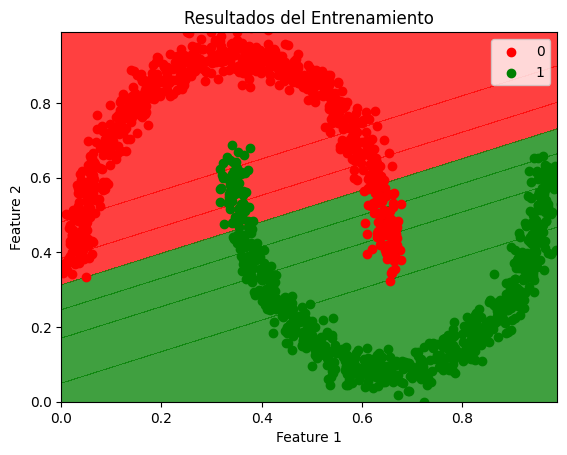

In [14]:
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train_scaled, y_train

X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() , stop = X_grid[:, 0].max(), step = 0.01),
                     np.arange(start = X_grid[:, 1].min(), stop = X_grid[:, 1].max(), step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Resultados del Entrenamiento')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [15]:
# Se calculan las predicciones del modelo para graficar la matriz de confusión
# Se compara contra 0.5 para determinar si es clase 0 ó clase 1
# ya que la salida que da la función Sigmoid es continua entre 0 y 1
y_predict = (model.predict(X_test_scaled) > 0.5).astype("int32")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step


<Axes: >

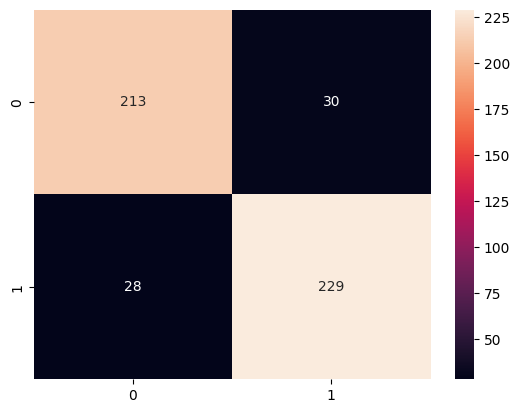

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")

# Se agregan dos capas de neuronas entre la entrada y salida y se repiten los pasos anteriores

In [17]:
model = Sequential()
# capa de oculta con 20 nodos
model.add(Dense(units=20, input_dim=2, activation='relu'))
# capa oculta con 10 neuronas
model.add(Dense(units=10, activation='relu'))
# capa oculta con 10 neuronas
model.add(Dense(units=10, activation='relu'))
# capa de salida con una neurona 
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy',  metrics=['accuracy'])

/opt/anaconda3/envs/master-ai-tec/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
hist = model.fit(x=X_train_scaled, y=y_train, verbose=2, batch_size=50,epochs=100, shuffle='true')

Epoch 1/100
30/30 - 0s - 11ms/step - accuracy: 0.8587 - loss: 0.4012
Epoch 2/100
30/30 - 0s - 676us/step - accuracy: 0.8780 - loss: 0.2587
Epoch 3/100
30/30 - 0s - 636us/step - accuracy: 0.8833 - loss: 0.2548
Epoch 4/100
30/30 - 0s - 532us/step - accuracy: 0.8927 - loss: 0.2313
Epoch 5/100
30/30 - 0s - 511us/step - accuracy: 0.8940 - loss: 0.2178
Epoch 6/100
30/30 - 0s - 500us/step - accuracy: 0.8933 - loss: 0.2226
Epoch 7/100
30/30 - 0s - 507us/step - accuracy: 0.8993 - loss: 0.2099
Epoch 8/100
30/30 - 0s - 554us/step - accuracy: 0.8893 - loss: 0.2236
Epoch 9/100
30/30 - 0s - 454us/step - accuracy: 0.9007 - loss: 0.2070
Epoch 10/100
30/30 - 0s - 458us/step - accuracy: 0.8933 - loss: 0.2173
Epoch 11/100
30/30 - 0s - 458us/step - accuracy: 0.8980 - loss: 0.2148
Epoch 12/100
30/30 - 0s - 465us/step - accuracy: 0.8980 - loss: 0.2045
Epoch 13/100
30/30 - 0s - 455us/step - accuracy: 0.8967 - loss: 0.2248
Epoch 14/100
30/30 - 0s - 445us/step - accuracy: 0.9007 - loss: 0.2120
Epoch 15/100
30/

In [19]:
# resumen del model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,175 (4.59 KB)

 Trainable params: 391 (1.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 784 (3.07 KB)

Text(0.5, 0, 'Epoca')

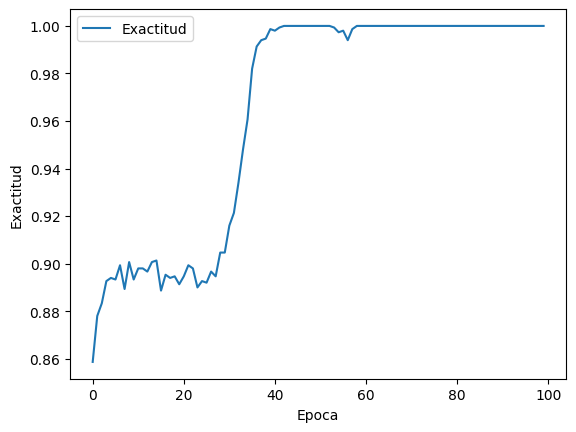

In [20]:
# Exactitud del modelo
plt.plot(hist.history['accuracy']) 
plt.legend(['Exactitud'])
plt.ylabel('Exactitud')
plt.xlabel('Epoca')

Text(0.5, 0, 'Epoca')

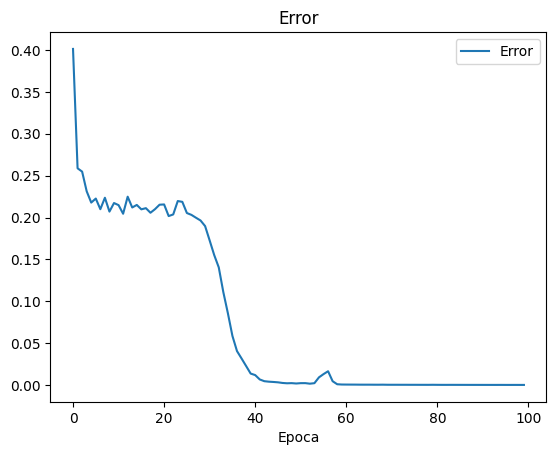

In [21]:
# Función de pérdida
plt.plot(hist.history['loss'])
plt.legend(['Error'])
plt.title('Error')
plt.xlabel('Epoca')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step


/var/folders/w6/304l7tqs0f946cfnk4fb4vg80000gp/T/ipykernel_73622/3145507442.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


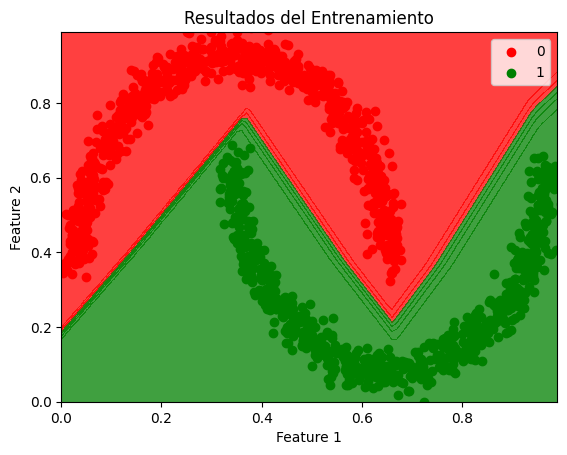

In [22]:
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train_scaled, y_train

X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() , stop = X_grid[:, 0].max(), step = 0.01),
                     np.arange(start = X_grid[:, 1].min(), stop = X_grid[:, 1].max(), step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Resultados del Entrenamiento')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [23]:
# Se calculan las predicciones del modelo para graficar la matriz de confusión
# Se compara contra 0.5 para determinar si es clase 0 ó clase 1
# ya que la salida que da la función Sigmoid es continua entre 0 y 1
y_predict = (model.predict(X_test_scaled) > 0.5).astype("int32")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step


<Axes: >

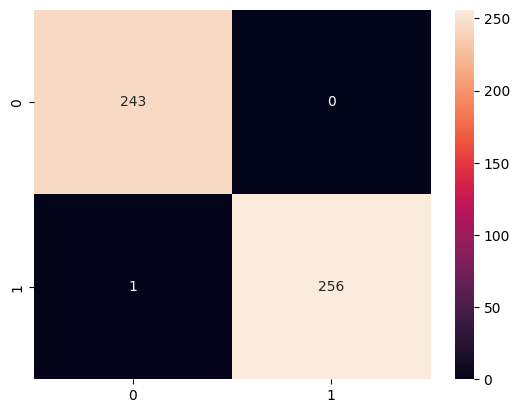

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")

# Gracias por la atención